We start this analysis by preprocessing the datas, then we will train different neural nets and linear regression models.

In [1]:
import numpy as np
import pandas as pd
from ANN import train_model, predict, evaluate
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing 

In [2]:
data= pd.read_csv(r'data.csv')

In [3]:
data.head(10)

,Unnamed: 0,type_appartement,nombre_pièces,nombre_chambres,surface,étage,terasse,ascenceur,prix_achat,credit,localisation,description
0,0,Appartement,4,2.0,104.0,NaN,non défini,non défini,499000,2065,Lyon 3ème,La Guillotière Nord
1,1,Appartement,3,2.0,72.0,NaN,non défini,non défini,449505,1861,Lyon 1er,Terreaux
2,2,Appartement,5,4.0,99.0,NaN,non défini,non défini,410000,1699,Lyon 8ème,Transvaal
3,3,Appartement,3,2.0,61.0,NaN,non défini,non défini,437000,1810,Lyon 6ème,Les Brotteaux-Bellecombe-Masséna
4,4,Appartement,4,3.0,129.0,NaN,non défini,non défini,725000,2997,Lyon 7ème,CHARME DE L'ANCIEN pour cet appartement de 129...
5,5,Appartement,5,4.0,130.0,NaN,non défini,non défini,1350000,5572,Lyon 6ème,Tête d'Or-Foch-Vitton
6,6,Appartement,3,2.0,69.0,NaN,non défini,non défini,420000,1740,Lyon 6ème,Les Brotteaux-Bellecombe-Masséna
7,7,Appartement,4,3.0,86.0,NaN,non défini,non défini,417000,1727,Lyon 3ème,Villette
8,8,Appartement,4,3.0,150.0,NaN,non défini,non défini,749000,3095,Lyon 9ème,Vaise-Rochecardon-Industrie
9,9,Appartement,4,3.0,93.0,NaN,non défini,non défini,345000,1431,Lyon 8ème,États-Unis


In [4]:
# See how many categories there are in localisation
print(data['localisation'].nunique())
data.groupby('localisation').nunique().index

14


Index(['Contenu sponsorisé', 'Lyon 1er', 'Lyon 2ème', 'Lyon 3ème', 'Lyon 4ème',
       'Lyon 5ème', 'Lyon 6ème', 'Lyon 7ème', 'Lyon 8ème', 'Lyon 9ème',
       'Rillieux-la-Pape', 'Tassin-la-Demi-Lune', 'Villeurbanne', 'Écully'],
      dtype='object', name='localisation')

In [5]:
# Transform into numeric value and drop the useless category ('Contenu sponsorisé' = advertisement from the announce website due to scraping)
loc_encoder = OrdinalEncoder()
data['localisation'] = loc_encoder.fit_transform(data[['localisation']])

In [6]:
data= data.drop(data[data['localisation']==0].index)

In [7]:
# Let's visualize localisation categories and reorganise columns
col = data.columns.to_list()
col

['Unnamed: 0',
 'type_appartement',
 'nombre_pièces',
 'nombre_chambres',
 'surface',
 'étage',
 'terasse',
 'ascenceur',
 'prix_achat',
 'credit',
 'localisation',
 'description']

In [8]:
col = ['Unnamed: 0',
 'type_appartement',
 'nombre_pièces',
 'nombre_chambres',
 'surface',
 'étage',
 'terasse',
 'ascenceur',
 'credit',
 'localisation',
 'description',
'prix_achat']

In [9]:
data = data[col]
data

,Unnamed: 0,type_appartement,nombre_pièces,nombre_chambres,surface,étage,terasse,ascenceur,credit,localisation,description,prix_achat
0,0,Appartement,4,2.0,104.0,NaN,non défini,non défini,2065,3.0,La Guillotière Nord,499000
1,1,Appartement,3,2.0,72.0,NaN,non défini,non défini,1861,1.0,Terreaux,449505
2,2,Appartement,5,4.0,99.0,NaN,non défini,non défini,1699,8.0,Transvaal,410000
3,3,Appartement,3,2.0,61.0,NaN,non défini,non défini,1810,6.0,Les Brotteaux-Bellecombe-Masséna,437000
4,4,Appartement,4,3.0,129.0,NaN,non défini,non défini,2997,7.0,CHARME DE L'ANCIEN pour cet appartement de 129...,725000
...,...,...,...,...,...,...,...,...,...,...,...,...
3250,3250,Appartement,6,5.0,218.0,NaN,non défini,non défini,7220,2.0,Perrache-Le Confluent,1750000
3251,3251,Appartement,4,3.0,87.0,NaN,non défini,non défini,1740,13.0,Le-Perollier,420000
3252,3252,Appartement,3,2.0,69.0,NaN,non défini,non défini,1740,6.0,Les Brotteaux-Bellecombe-Masséna,420000
3253,3253,Appartement,4,3.0,86.0,NaN,non défini,non défini,1727,3.0,Villette,417000


In [10]:
# Show some statistics 
data.describe()

,Unnamed: 0,nombre_pièces,nombre_chambres,surface,étage,localisation,prix_achat
count,3245.000000,3245.000000,2869.000000,3228.000000,104.000000,3245.000000,3.245000e+03
mean,1631.510015,3.233282,2.348902,80.393123,4.259615,4.991680,4.829525e+05
std,937.698274,1.370196,1.045971,42.796273,1.762584,2.551611,3.288190e+05
min,0.000000,1.000000,1.000000,7.000000,1.000000,1.000000,4.500000e+04
25%,821.000000,2.000000,2.000000,53.000000,3.000000,3.000000,2.750000e+05
50%,1632.000000,3.000000,2.000000,75.000000,4.500000,5.000000,3.990000e+05
75%,2443.000000,4.000000,3.000000,99.000000,5.000000,7.000000,5.950000e+05
max,3254.000000,10.000000,14.000000,364.000000,10.000000,13.000000,3.300000e+06


<AxesSubplot:>

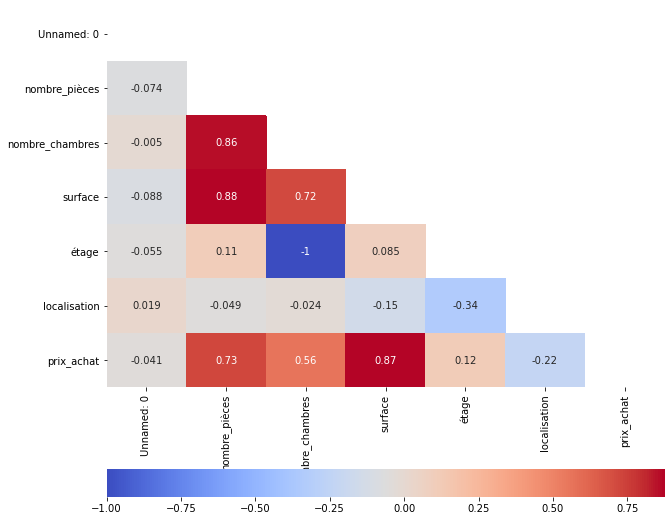

In [11]:
# take a look at correlations
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(method= 'pearson'), annot= True, cmap= 'coolwarm', mask = np.triu(data.corr()), cbar_kws = {'orientation':'horizontal'})

<AxesSubplot:>

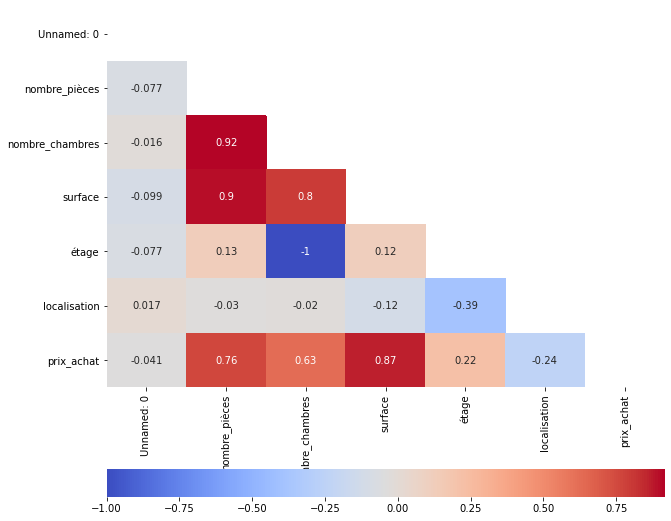

In [12]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(method= 'spearman'), annot= True, cmap= 'coolwarm', mask = np.triu(data.corr()), cbar_kws = {'orientation':'horizontal'})

For both correlation coeff, it let us know that we should select : nombre_pièces, nombre_chambres, surface (most correlated), localisation (less correlated but we will assume that it's an important point)
We won't take "étage" as we will see next there is not enough information on it

<AxesSubplot:>

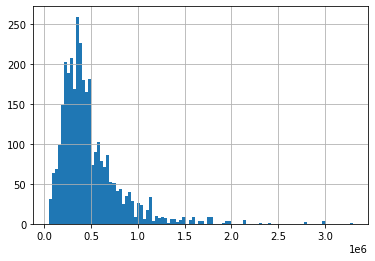

In [13]:
# Let's look at the distribution of our outputs
data['prix_achat'].hist(bins = 100)

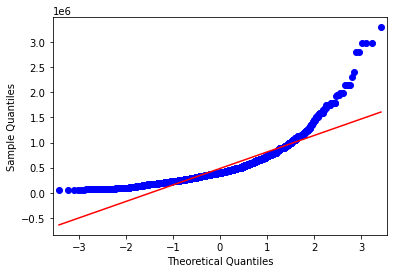

In [14]:
# A normal distribution could help the model to predict better
from statsmodels.graphics.gofplots import qqplot
qqplot(data['prix_achat'], line ='s')
plt.show()

In [15]:
# To ensure good predictions and artificially improve the distribution, we will remove the extremes low and high prices (see data.describes)
data = data[(data['prix_achat']<595000) & (data['prix_achat']> 275000)]

<AxesSubplot:>

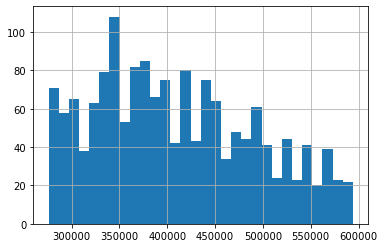

In [16]:
data['prix_achat'].hist(bins =30)

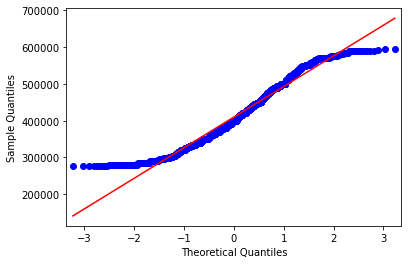

In [17]:
qqplot(data['prix_achat'], line ='s')
plt.show()

In [18]:
# Distribution is a bit better for our predictions

<AxesSubplot:>

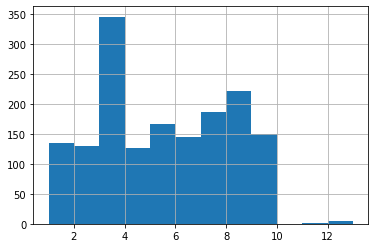

In [19]:
# Same thing with localisation, as we try to predict prices for appartments, we don't want districs that are poorly represented in the dataset
data['localisation'].hist(bins=12)

<AxesSubplot:>

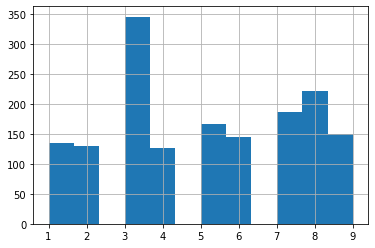

In [20]:
# We should remove cat than > 10 as they are not well represented in the dataset
data = data[(data['localisation'] <10)]
data['localisation'].hist(bins=12)

<AxesSubplot:>

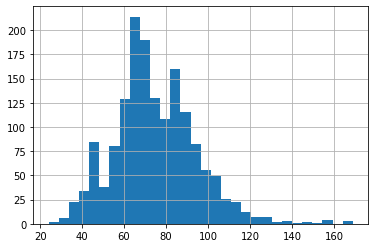

In [21]:
# Same job for surfaces
data['surface'].hist(bins = 30)

<AxesSubplot:>

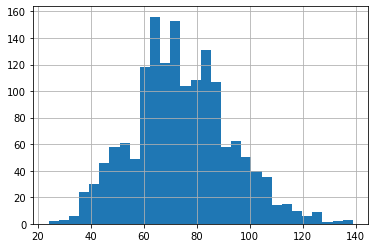

In [22]:
# Let's avoid great appartments poorly represented in the dataset and considering only ones < 140
data = data[data['surface']< 140]
data['surface'].hist(bins = 30)

<AxesSubplot:>

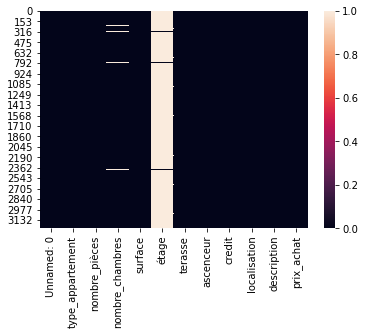

In [23]:
# See where there are missing values or nan
sns.heatmap(data.isna())

In [24]:
# According to best correlated variables and lack of information of some categories, we will remove all these columns (credit is just the same as prix_achat based on one month)
data.drop(['type_appartement', 'Unnamed: 0','étage', 'description','ascenceur','terasse', 'credit'],axis = 1, inplace= True)

In [25]:
# and now drop nan and missing values
data.dropna(inplace = True)
data.reset_index(drop= True, inplace = True)

In [26]:
data

,nombre_pièces,nombre_chambres,surface,localisation,prix_achat
0,4,2.0,104.0,3.0,499000
1,3,2.0,72.0,1.0,449505
2,5,4.0,99.0,8.0,410000
3,3,2.0,61.0,6.0,437000
4,3,2.0,69.0,6.0,420000
...,...,...,...,...,...
1552,3,2.0,72.0,1.0,449505
1553,5,4.0,99.0,8.0,410000
1554,3,2.0,61.0,6.0,437000
1555,3,2.0,69.0,6.0,420000


In [27]:
data.describe()

,nombre_pièces,nombre_chambres,surface,localisation,prix_achat
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,3.216442,2.116891,74.499679,5.066795,409168.830443
std,0.843872,0.784132,18.296249,2.493830,82323.632003
min,1.000000,1.000000,24.000000,1.000000,276000.000000
25%,3.000000,2.000000,63.000000,3.000000,342800.000000
50%,3.000000,2.000000,72.000000,5.000000,399000.000000
75%,4.000000,3.000000,86.000000,7.000000,472000.000000
max,6.000000,6.000000,139.000000,9.000000,594000.000000


Text(0, 0.5, 'price')

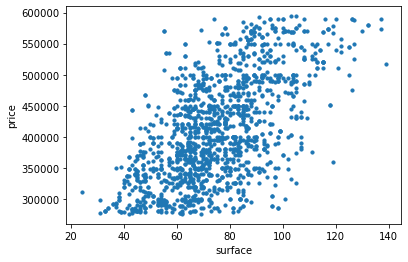

In [28]:
# We just take a look on the relation between surface (most correlated feature) and appart prices. 
plt.scatter(data['surface'], data[['prix_achat']], s = 10)
plt.xlabel('surface')
plt.ylabel('price')

As we can see there are huge differences for a same surface, price per square meters depending on districts and other features 
    
Let's plot this by categorizing districts and print statistics.

Text(0, 0.5, 'price')

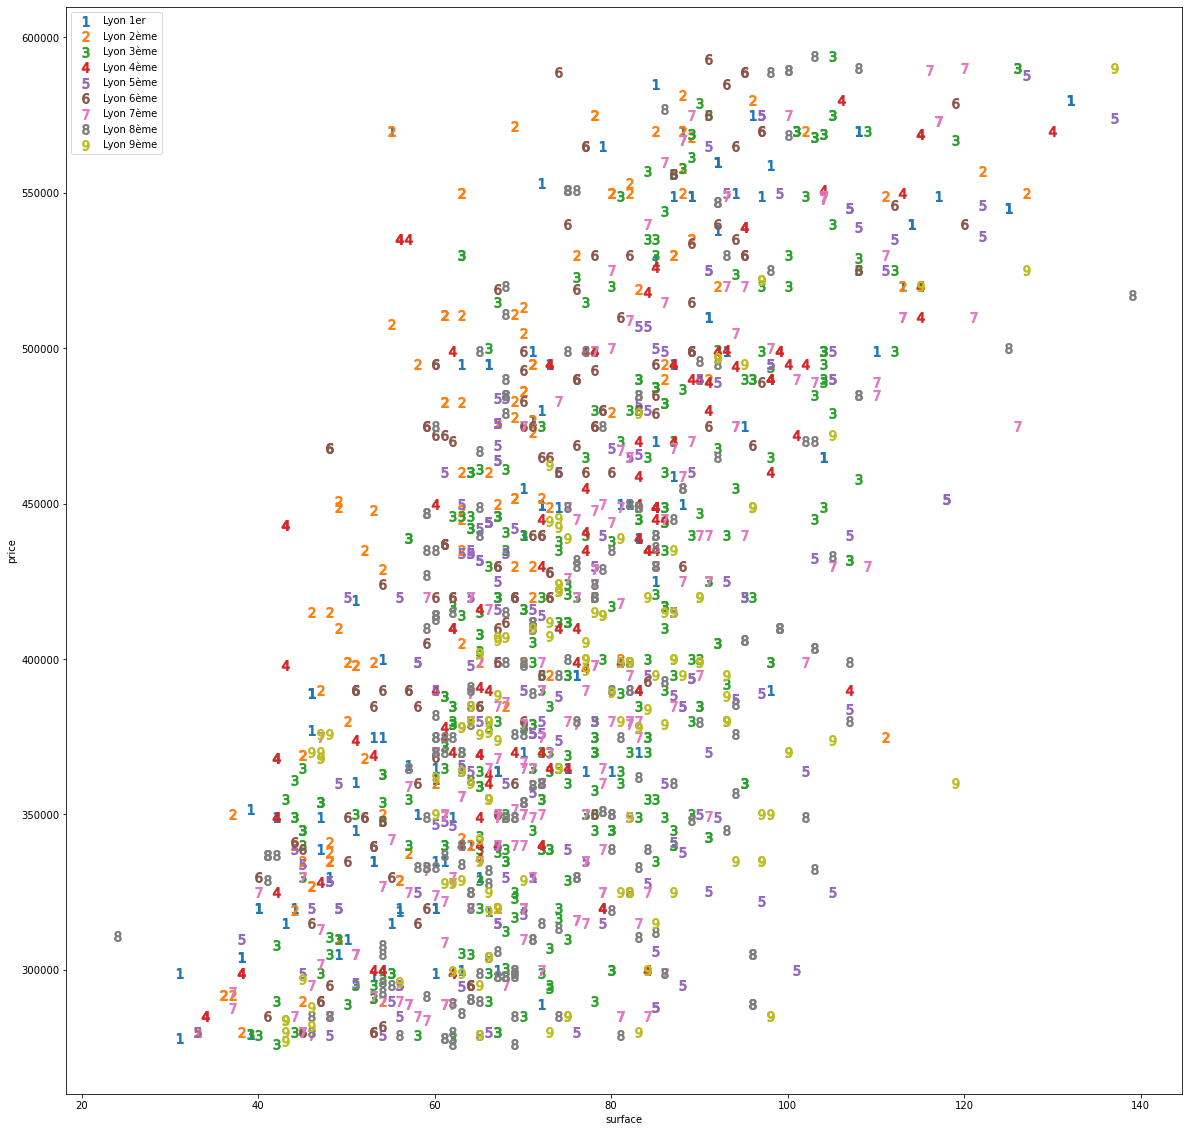

In [29]:
import itertools
markers = ['$' +str(i) + '$' for i in range(1,11)]
marker = itertools.cycle(markers)
grouped = data.groupby('localisation')
plt.figure(figsize = (20,20))
for key, group in grouped:
    key = loc_encoder.categories_[0][int(key)] # retransform loc variables into district name
    plt.scatter(group['surface'], group['prix_achat'], label = key, marker = next(marker), s= 100)
   
plt.legend()
plt.xlabel('surface')
plt.ylabel('price')

In [30]:
data.groupby('localisation')['prix_achat'].describe().sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
localisation,,,,,,,,
2.0,127.0,443025.669291,87478.505750,279900.0,368500.0,450000.0,512109.0,581353.0
6.0,140.0,439432.135714,83480.420063,280000.0,385000.0,440000.0,495000.0,593000.0
4.0,122.0,425785.000000,76804.915985,285000.0,368000.0,435000.0,494850.0,580000.0
1.0,119.0,424629.050420,94757.841008,278000.0,337000.0,400000.0,504500.0,585000.0
3.0,334.0,409890.131737,79156.177063,276000.0,349250.0,399000.0,461000.0,594000.0
5.0,164.0,405528.048780,77490.729743,279000.0,340000.0,399000.0,460000.0,588000.0
7.0,187.0,394018.411765,82101.207750,279000.0,329000.0,379000.0,445000.0,590000.0
8.0,219.0,387629.054795,78636.860092,276000.0,328500.0,376000.0,435000.0,594000.0
9.0,145.0,378154.296552,61786.434007,277000.0,329000.0,379000.0,412000.0,590000.0


In [31]:
data.groupby('localisation')['surface'].describe().sort_values(by='mean', ascending = True)

,count,mean,std,min,25%,50%,75%,max
localisation,,,,,,,,
2.0,127.0,66.000000,18.352804,33.0,50.50,64.0,77.00,127.0
6.0,140.0,70.671429,16.435373,40.0,59.00,70.0,80.25,120.0
1.0,119.0,72.436975,22.690489,31.0,54.50,71.0,88.00,132.0
8.0,219.0,74.333333,16.355100,24.0,63.50,71.0,83.50,139.0
7.0,187.0,75.812834,17.978848,37.0,64.00,76.0,85.50,126.0
4.0,122.0,76.213115,20.168804,34.0,62.25,77.0,87.00,130.0
3.0,334.0,76.703593,16.707487,39.0,65.25,75.5,87.00,126.0
9.0,145.0,76.751724,17.399925,43.0,66.00,75.0,87.00,137.0
5.0,164.0,76.817073,19.229086,33.0,64.75,72.0,89.00,137.0


We don't really see district clusters as we could expect. But the average prices in 2th 6th and 1st disctricts dominate the mean. We see that for the 2th and 6th disctricts the surfaces are smaller than others. And we have not a huge difference with the standard deviation and min/ max values in our dataset. It shows for both disctricts that there is a higher price per square meter. For the other it's difficult to conclude something. 

In [32]:
# Save original data before scaling all features
orig_data = data.copy()
# Create a dict with each scaler for each feature
column_scaler = {}

for column in data.columns:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(np.expand_dims(data[column].values, axis = 1))
    column_scaler[column] = scaler

In [33]:
# Transform pandas series into numpy array
X = np.array(data.drop(['prix_achat'], axis= 1))
print('X shape' + str(X.shape))
Y = np.array(data['prix_achat'])
Y = np.expand_dims(Y, axis = 1)
print('Y shape' + str(Y.shape))

X shape(1557, 4)
Y shape(1557, 1)


In [34]:
# check there is no nan in our matrices
assert np.any(np.isnan(X)) is not True 
assert np.any(np.isnan(Y)) is not True

Split data set into train set and test set

In [35]:
# Simply split by order in the dataset 
dataset_size= X.shape[0]
print('dataset size: ' + str(dataset_size))
TEST_SIZE = 0.25
train_sample = int(X.shape[0]*(1-TEST_SIZE))
print('train sample: ' + str(train_sample) + '\ntest_sample: '+ str(dataset_size - train_sample))
X_train = X[:train_sample,:]
Y_train = Y[:train_sample,:]
X_test = X[train_sample:,:]
Y_test = Y[train_sample:,:]

assert X_train.shape[0] == train_sample
assert Y_train.shape[0] == train_sample
assert X_test.shape[0] == dataset_size-train_sample
assert Y_test.shape[0] == dataset_size-train_sample

dataset size: 1557
train sample: 1167
test_sample: 390


In [36]:
# or shuffle and split with scikitlearn / / not big difference on this dataset if we shuffle
# from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)


In [37]:
# convert in shape (number of features, training examples) for feeding the model
X = X.T
Y= Y.T 
X_train = X_train.T 
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [38]:
print('X shape' + str(X.shape))
print('Y shape' + str(Y.shape))

print('X_train shape' + str(X_train.shape))
print('Y_train shape' + str(Y_train.shape))
print('X_test shape' + str(X_test.shape))
print('Y_test shape' + str(Y_test.shape))


X shape(4, 1557)
Y shape(1, 1557)
X_train shape(4, 1167)
Y_train shape(1, 1167)
X_test shape(4, 390)
Y_test shape(1, 390)


## NN "HANDMADE' MODELS 

Let's try a few models.

In the following models, learning rates and num_iterations have been systematically adjusted before to make the algorithm converges. Since it's handmade models we don't have used regularization and automatic optimizer like adam optimizer. 

In [39]:
stats = {}
# create a dictionnary of statistics in which we will put all our results for each models, NN and then Linear Regression

train_cost after iteration 0: 0.413076
test_cost after iteration 0: 0.433357
train_cost after iteration 100: 0.290302
test_cost after iteration 100: 0.306165
train_cost after iteration 200: 0.272743
test_cost after iteration 200: 0.288800
train_cost after iteration 300: 0.259975
test_cost after iteration 300: 0.276077
train_cost after iteration 400: 0.250667
test_cost after iteration 400: 0.266481
train_cost after iteration 500: 0.243357
test_cost after iteration 500: 0.258644
train_cost after iteration 600: 0.237958
test_cost after iteration 600: 0.252285
train_cost after iteration 700: 0.233442
test_cost after iteration 700: 0.246963
train_cost after iteration 800: 0.229782
test_cost after iteration 800: 0.242536
train_cost after iteration 900: 0.226805
test_cost after iteration 900: 0.238773
train_cost after iteration 1000: 0.224356
test_cost after iteration 1000: 0.235596
train_cost after iteration 1100: 0.222451
test_cost after iteration 1100: 0.232929
train_cost after iteration 1

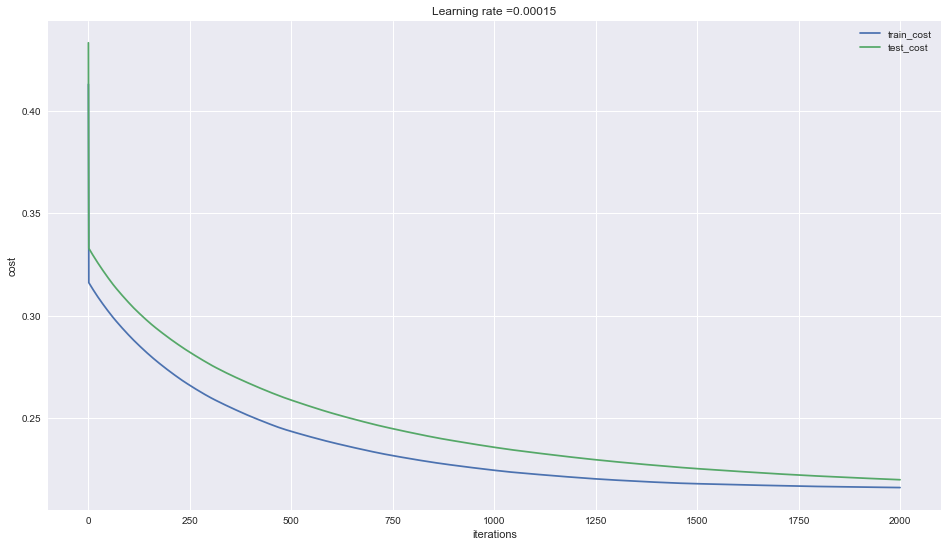

MAE                      0.217
train_MAE                0.216
test_MAE                  0.22
MSE                      0.071
train_MSE                0.071
test_MSE                 0.071
RMSE                     0.267
train_RMSE               0.517
test_RMSE                0.517
MEAN                     0.419
R2                      -0.063


In [40]:
# 3 layers model with one hidden units or 32 neurons, no activation function = linear activation, and Mean absolute Error Loss as cost function
LAYERS_DIMS = [4,32,1]
parameters, stats['NN_model1'] = train_model(X_train, Y_train,
                           X_test,Y_test,
                           LAYERS_DIMS,
                           activation = 'linear', 
                           loss = 'MAE_loss',
                           learning_rate = 0.00015, num_iterations = 2000 ,print_cost = True, return_evaluation = True)

Convergence looks ok, but statistics are not really good. Remember that we have scaled datas between 0 and 1, so MAE around 0.2 is really not exceptionnal (20% error). 
Besides we see that the determination coefficient R2 is negative, it shows how the model will predict poorly.
RMSE when compared to the MEAN shows that the variance reaches 63% (RMSE/MEAN) of the average observations. 
To verify let's take a look on predictions.

In [41]:
# write a function to put predictions in dataframe and print max and avg error to illustrate our stats
def add_results(X, parameters, orig_data, n):
    predictions = predict(X, parameters)
    predictions = np.transpose(predictions) 
    predictions = column_scaler['prix_achat'].inverse_transform(predictions)
    orig_data['NN_predictions'+str(n)] = predictions.astype('int')
    orig_data['NN_error'+ str(n)] = ((orig_data['prix_achat']- orig_data['NN_predictions'+str(n)])/orig_data['prix_achat']).round(decimals = 4)
    
    
    print('avg error: ' + str(np.mean(np.absolute(orig_data['NN_error'+str(n)]))))
    print('max error: ' + str(np.max(orig_data['NN_error'+str(n)])))
    
    return orig_data.loc[[orig_data['NN_error' + str(n)].idxmax()]]
   

In [42]:
add_results(X, parameters, orig_data, 1)

avg error: 0.16578657675016018
max error: 0.3463


,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1
241,4,2.0,105.0,3.0,594000,388316,0.3463


Here we see the max error, about 35% of the real price, let's save the index of this example to see if this particular case is difficult to predict

In [43]:
max_error_idx = [241]

In [44]:
orig_data[orig_data['NN_error1']< 0.16]

,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1
1,3,2.0,72.0,1.0,449505,387993,0.1368
2,5,4.0,99.0,8.0,410000,388871,0.0515
3,3,2.0,61.0,6.0,437000,388191,0.1117
4,3,2.0,69.0,6.0,420000,388215,0.0757
5,4,3.0,86.0,3.0,417000,388364,0.0687
...,...,...,...,...,...,...,...
1552,3,2.0,72.0,1.0,449505,387993,0.1368
1553,5,4.0,99.0,8.0,410000,388871,0.0515
1554,3,2.0,61.0,6.0,437000,388191,0.1117
1555,3,2.0,69.0,6.0,420000,388215,0.0757


In [45]:
orig_data[orig_data['NN_error1']< 0.16].shape[0]/ orig_data.shape[0]

0.72703917790623

It means in 72 % cases of predictions we have an error < to 16%, it's not so bad as expected, but it's not enough.

train_cost after iteration 0: 0.413889
test_cost after iteration 0: 0.433955
train_cost after iteration 100: 0.194026
test_cost after iteration 100: 0.194261
train_cost after iteration 200: 0.193249
test_cost after iteration 200: 0.192443
train_cost after iteration 300: 0.192184
test_cost after iteration 300: 0.191392
train_cost after iteration 400: 0.191046
test_cost after iteration 400: 0.190568
train_cost after iteration 500: 0.189912
test_cost after iteration 500: 0.189835
train_cost after iteration 600: 0.188819
test_cost after iteration 600: 0.189147
train_cost after iteration 700: 0.187771
test_cost after iteration 700: 0.188534
train_cost after iteration 800: 0.186772
test_cost after iteration 800: 0.187980
train_cost after iteration 900: 0.185831
test_cost after iteration 900: 0.187454
train_cost after iteration 1000: 0.184935
test_cost after iteration 1000: 0.186947
train_cost after iteration 1100: 0.184105
test_cost after iteration 1100: 0.186454
train_cost after iteration 1

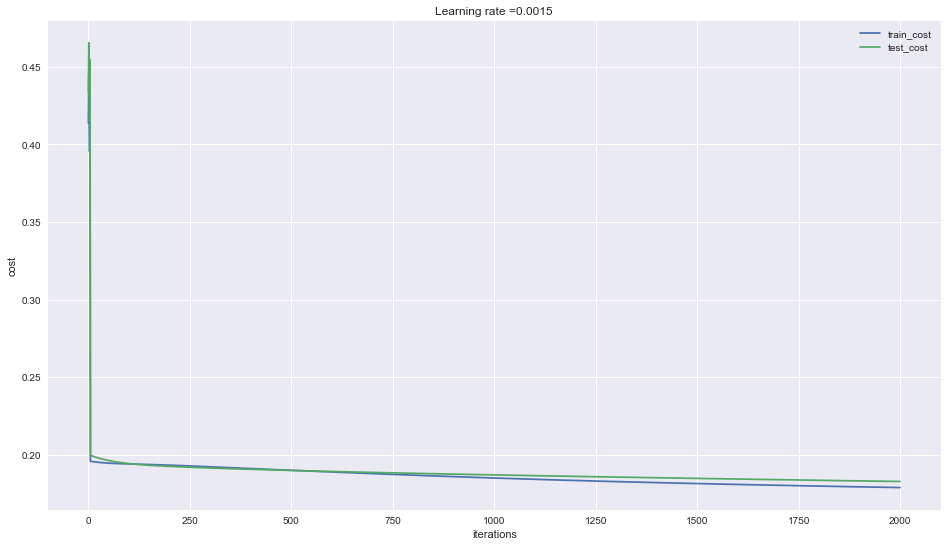

MAE                       0.18
train_MAE                0.179
test_MAE                 0.183
MSE                      0.047
train_MSE                0.047
test_MSE                 0.046
RMSE                     0.217
train_RMSE               0.465
test_RMSE                0.465
MEAN                     0.419
R2                       0.299


In [46]:
# Let's make some modification, take the simpliest ANN and change the learning rate 
LAYERS_DIMS = [4, 1]
parameters, stats['NN_model2'] = train_model(X_train, Y_train,
                           X_test,Y_test,
                           LAYERS_DIMS,
                           activation = 'linear', 
                           loss = 'MAE_loss',
                           learning_rate = 0.0015, num_iterations = 2000,print_cost = True)

Interesting, MAE and others stats looks a bit better, MAE 0,17 instead of 0,2, RMSE/MEAN now variance reaches 50 % of average observation, especially R2 arround 0.3 is now > 0 . Definitely not an efficient model but we have made progress. 

In [47]:
add_results(X, parameters, orig_data, 2)

avg error: 0.14393853564547224
max error: 0.3251


,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1,NN_predictions2,NN_error2
755,3,2.0,74.0,6.0,589000,388230,0.3409,397508,0.3251


In [48]:
# We see that a different example is the most mispredicted.
max_error_idx.append(755)
orig_data[orig_data['NN_error2']< 0.14]

,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1,NN_predictions2,NN_error2
0,4,2.0,104.0,3.0,499000,388313,0.2218,455996,0.0862
1,3,2.0,72.0,1.0,449505,387993,0.1368,427154,0.0497
2,5,4.0,99.0,8.0,410000,388871,0.0515,447739,-0.0920
3,3,2.0,61.0,6.0,437000,388191,0.1117,386245,0.1161
4,3,2.0,69.0,6.0,420000,388215,0.0757,393176,0.0639
...,...,...,...,...,...,...,...,...,...
1552,3,2.0,72.0,1.0,449505,387993,0.1368,427154,0.0497
1553,5,4.0,99.0,8.0,410000,388871,0.0515,447739,-0.0920
1554,3,2.0,61.0,6.0,437000,388191,0.1117,386245,0.1161
1555,3,2.0,69.0,6.0,420000,388215,0.0757,393176,0.0639


In [49]:
orig_data[orig_data['NN_error2']< 0.14].shape[0]/ orig_data.shape[0]

0.8169556840077071

Here we predict 81 % of cases with an error which is less than 14%, this is a little improvement.

Let's try same models as before but with a different cost function based on huber losses. 

train_cost after iteration 0: 98.418159
test_cost after iteration 0: 35.036665
train_cost after iteration 100: 44.862556
test_cost after iteration 100: 15.877598
train_cost after iteration 200: 42.409660
test_cost after iteration 200: 14.881123
train_cost after iteration 300: 40.717969
test_cost after iteration 300: 14.166155
train_cost after iteration 400: 39.530204
test_cost after iteration 400: 13.641761
train_cost after iteration 500: 38.685699
test_cost after iteration 500: 13.250489
train_cost after iteration 600: 38.079897
test_cost after iteration 600: 12.954837
train_cost after iteration 700: 37.643632
test_cost after iteration 700: 12.729328
train_cost after iteration 800: 37.329465
test_cost after iteration 800: 12.555616
train_cost after iteration 900: 37.104021
test_cost after iteration 900: 12.420854


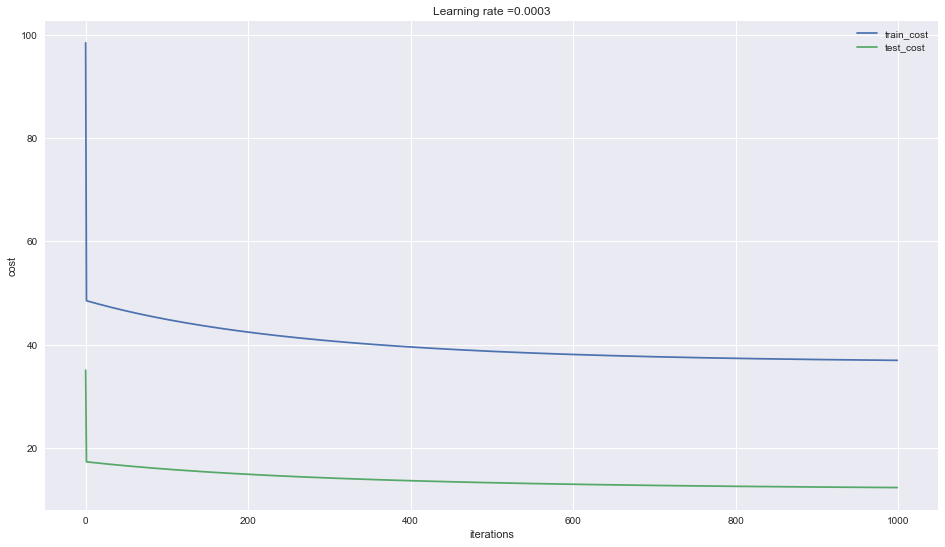

MAE                      0.216
train_MAE                0.216
test_MAE                 0.217
MSE                      0.069
train_MSE                 0.07
test_MSE                 0.069
RMSE                     0.263
train_RMSE               0.513
test_RMSE                0.513
MEAN                     0.419
R2                      -0.036


In [50]:
LAYERS_DIMS = [4, 32, 1]
parameters, stats['NN_model3'] = train_model(X_train, Y_train,
                           X_test,Y_test,
                           LAYERS_DIMS,
                           activation = 'linear', 
                           loss = 'huber_loss',
                           learning_rate = 0.0003, num_iterations = 1000,print_cost = True )

Poor results, as first model

In [51]:
add_results(X,parameters, orig_data, 3)

avg error: 0.1671813102119462
max error: 0.3379


,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1,NN_predictions2,NN_error2,NN_predictions3,NN_error3
241,4,2.0,105.0,3.0,594000,388316,0.3463,456862,0.2309,393283,0.3379


In [52]:
max_error_idx.append(241)
orig_data[orig_data['NN_error3']< 0.17].shape[0]/ orig_data.shape[0]

0.7514450867052023

train_cost after iteration 0: 98.456851
test_cost after iteration 0: 35.062155
train_cost after iteration 100: 39.940633
test_cost after iteration 100: 14.016062
train_cost after iteration 200: 35.399693
test_cost after iteration 200: 12.099829
train_cost after iteration 300: 33.417914
test_cost after iteration 300: 11.191727
train_cost after iteration 400: 32.465738
test_cost after iteration 400: 10.717222
train_cost after iteration 500: 31.962548
test_cost after iteration 500: 10.447414
train_cost after iteration 600: 31.658569
test_cost after iteration 600: 10.279661
train_cost after iteration 700: 31.444043
test_cost after iteration 700: 10.165695
train_cost after iteration 800: 31.269729
test_cost after iteration 800: 10.081421
train_cost after iteration 900: 31.113538
test_cost after iteration 900: 10.014282
train_cost after iteration 1000: 30.965772
test_cost after iteration 1000: 9.957609
train_cost after iteration 1100: 30.822392
test_cost after iteration 1100: 9.907673
train_

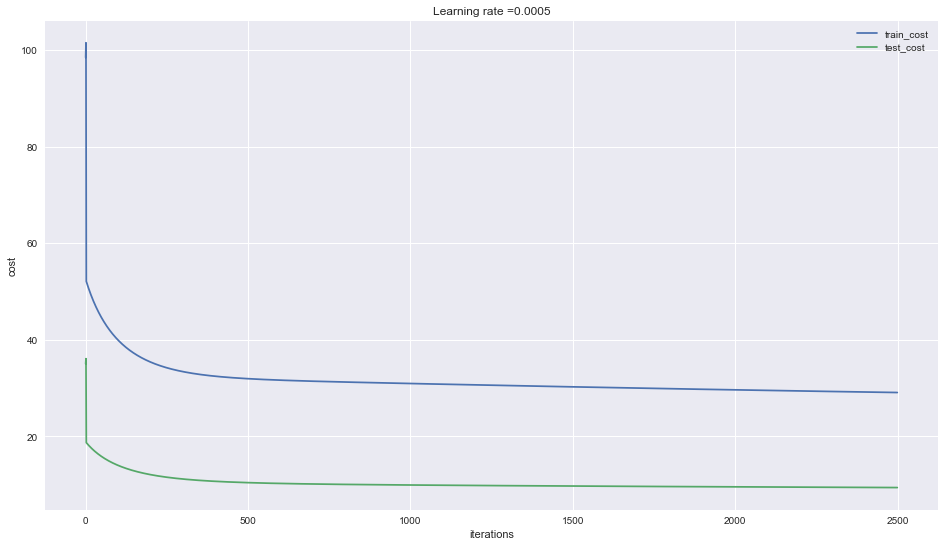

MAE                      0.189
train_MAE                 0.19
test_MAE                 0.189
MSE                      0.052
train_MSE                0.052
test_MSE                  0.05
RMSE                     0.228
train_RMSE               0.477
test_RMSE                0.477
MEAN                     0.419
R2                       0.227


In [53]:
LAYERS_DIMS = [4,1]
parameters, stats['NN_model4'] = train_model(X_train, Y_train,
                           X_test,Y_test,
                           LAYERS_DIMS,
                           activation = 'linear', 
                           loss = 'huber_loss',
                           learning_rate = 0.0005, num_iterations = 2500,print_cost = True)

In [54]:
add_results(X, parameters, orig_data, 4)

avg error: 0.15152504816955684
max error: 0.3311


,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1,NN_predictions2,NN_error2,NN_predictions3,NN_error3,NN_predictions4,NN_error4
1173,2,1.0,55.0,2.0,570000,387752,0.3197,385588,0.3235,392735,0.311,381266,0.3311


In [55]:
max_error_idx.append(1173)
orig_data[orig_data['NN_error4']< 0.15].shape[0]/ orig_data.shape[0]

0.8131021194605009

We have finally no big difference with MAE loss.
Take a look to the most mispredicted examples through each models

In [57]:
max_error_idx

[241, 755, 241, 1173]

In [58]:
df_mx_err = orig_data.iloc[max_error_idx]
df_mx_err

,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1,NN_predictions2,NN_error2,NN_predictions3,NN_error3,NN_predictions4,NN_error4
241,4,2.0,105.0,3.0,594000,388316,0.3463,456862,0.2309,393283,0.3379,436347,0.2654
755,3,2.0,74.0,6.0,589000,388230,0.3409,397508,0.3251,393203,0.3324,401874,0.3177
241,4,2.0,105.0,3.0,594000,388316,0.3463,456862,0.2309,393283,0.3379,436347,0.2654
1173,2,1.0,55.0,2.0,570000,387752,0.3197,385588,0.3235,392735,0.3110,381266,0.3311


In [59]:
# 241th example appears twice, we could consider it as an outlier

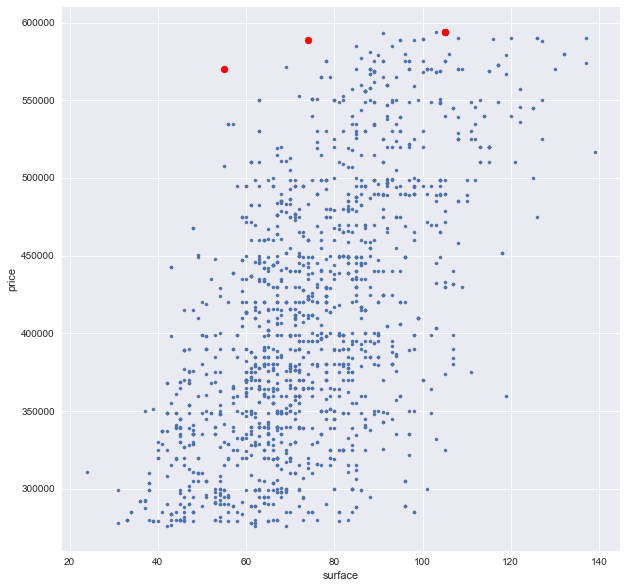

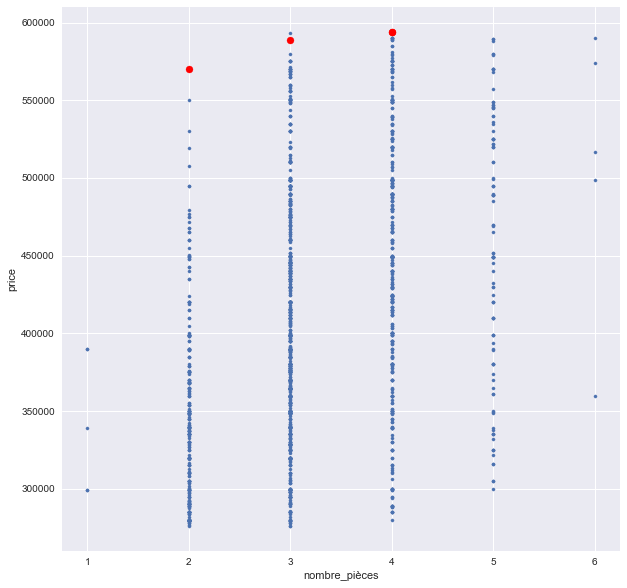

In [60]:
plt.figure(figsize = (10,10))
plt.scatter(orig_data['surface'], orig_data[['prix_achat']], s = 10)
plt.xlabel('surface')
plt.ylabel('price')
plt.scatter(df_mx_err['surface'], df_mx_err['prix_achat'], c ='red')

plt.figure(figsize = (10,10))
plt.scatter(orig_data['nombre_pièces'], orig_data[['prix_achat']], s = 10)
plt.xlabel('nombre_pièces')
plt.ylabel('price')
plt.scatter(df_mx_err['nombre_pièces'], df_mx_err['prix_achat'], c ='red')

It seems that there are extreme values which are not well represented for both most correlated features (surface and room numbers), the model understand these examples as outliers and are difficult to predict for it. 

## LINEAR REGRESSION

In [62]:
import LinearRegression as LR
from LinearRegression import linear_regression
from functions import polynomial_features

In [63]:
# We already have our dataset, we just need to transpose X, Y train and test to have the good shape for LR
data

,nombre_pièces,nombre_chambres,surface,localisation,prix_achat
0,0.6,0.2,0.695652,0.250,0.701258
1,0.4,0.2,0.417391,0.000,0.545613
2,0.8,0.6,0.652174,0.875,0.421384
3,0.4,0.2,0.321739,0.625,0.506289
4,0.4,0.2,0.391304,0.625,0.452830
...,...,...,...,...,...
1552,0.4,0.2,0.417391,0.000,0.545613
1553,0.8,0.6,0.652174,0.875,0.421384
1554,0.4,0.2,0.321739,0.625,0.506289
1555,0.4,0.2,0.391304,0.625,0.452830


In [64]:
X_train = np.transpose(X_train)
Y_train = np.transpose(Y_train)
X_test = np.transpose(X_test)
Y_test = np.transpose(Y_test)

In [65]:
X = np.transpose(X)
Y = np.transpose(Y)

In [66]:
X_train.shape

(1167, 4)

train_cost after iteration 0: 0.116404
test_cost after iteration 0: 0.123299
train_cost after iteration 100: 0.033725
test_cost after iteration 100: 0.033115
train_cost after iteration 200: 0.030118
test_cost after iteration 200: 0.028454
train_cost after iteration 300: 0.029063
test_cost after iteration 300: 0.027370
train_cost after iteration 400: 0.028213
test_cost after iteration 400: 0.026652
train_cost after iteration 500: 0.027479
test_cost after iteration 500: 0.026063
train_cost after iteration 600: 0.026843
test_cost after iteration 600: 0.025560
train_cost after iteration 700: 0.026290
test_cost after iteration 700: 0.025128
train_cost after iteration 800: 0.025808
test_cost after iteration 800: 0.024755
train_cost after iteration 900: 0.025387
test_cost after iteration 900: 0.024432
train_cost after iteration 1000: 0.025020
test_cost after iteration 1000: 0.024152
train_cost after iteration 1100: 0.024697
test_cost after iteration 1100: 0.023908
train_cost after iteration 1

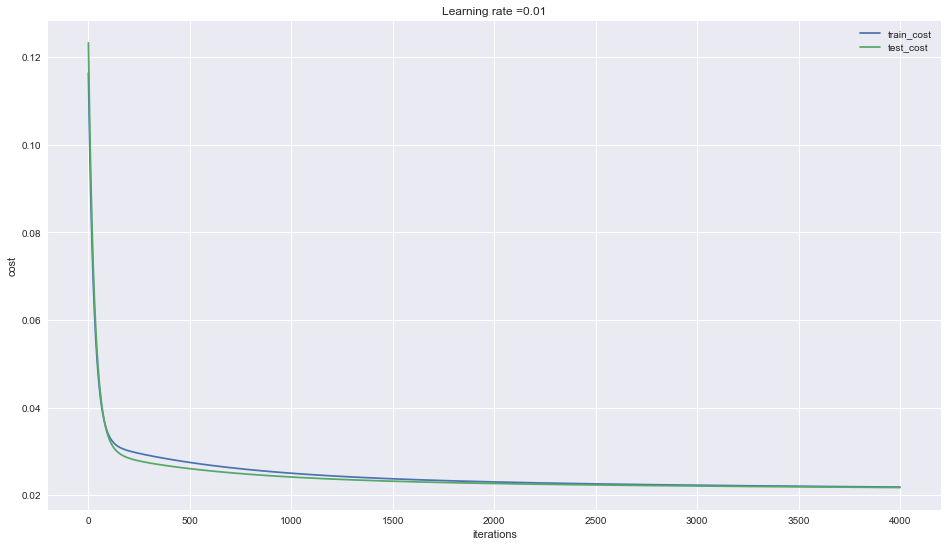

MAE                      0.172
train_MAE                0.171
test_MAE                 0.174
MSE                      0.044
train_MSE                0.044
test_MSE                 0.044
RMSE                     0.209
train_RMSE               0.457
test_RMSE                0.457
MEAN                     0.419
R2                       0.348


In [67]:
LEARNING_RATE = 0.01
NUM_ITERS = 4000
param, stats['LR_model1'] = linear_regression(X_train, Y_train, X_test, Y_test,LEARNING_RATE,NUM_ITERS)

Results are clearly better than our first model, here we just use the basic features with a simple linear regression. We have MAE reduces to 0,17  and R2 arround 0.35. 

In [68]:
# Recreate an add result function adapted to our Linear Regression method
def add_LR_results(X, parameters, orig_data, n):
    predictions = LR.predict(X, parameters, init = True) 
    predictions = column_scaler['prix_achat'].inverse_transform(predictions)
    orig_data['LR_predictions'+str(n)] = predictions.astype('int')
    orig_data['LR_error'+ str(n)] = ((orig_data['prix_achat']- orig_data['LR_predictions'+str(n)])/orig_data['prix_achat']).round(decimals = 3)
    
    print('avg error: ' + str(np.mean(np.absolute(orig_data['LR_error'+str(n)]))))
    print('max error: ' + str(np.max(orig_data['LR_error'+str(n)])))
    

Let's now use polynomial features on our existent features to see if we perform better

--- Try out with a 2 degree polynome ---


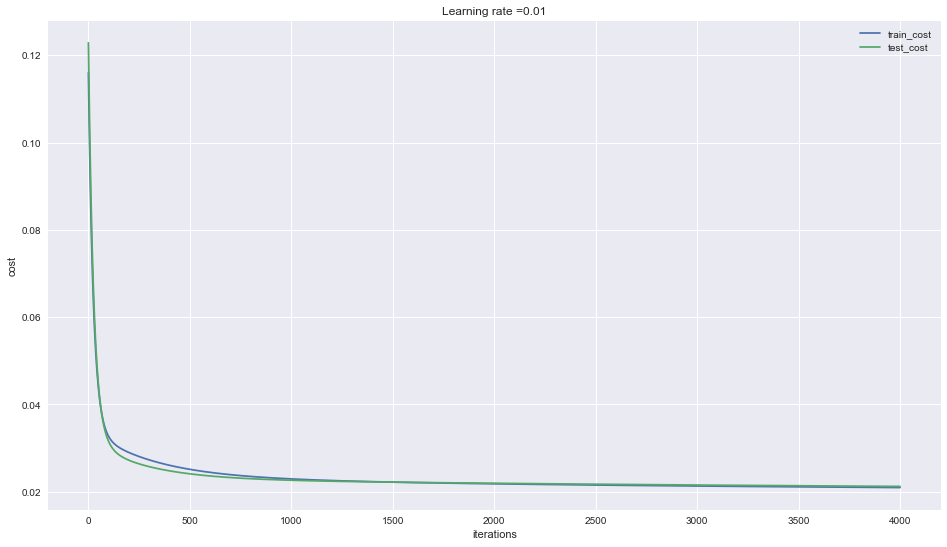

MAE                      0.168
train_MAE                0.167
test_MAE                  0.17
MSE                      0.042
train_MSE                0.042
test_MSE                 0.042
RMSE                     0.205
train_RMSE               0.453
test_RMSE                0.453
MEAN                     0.419
R2                       0.373
avg error: 0.13496917148362222
max error: 0.332


--- Try out with a 3 degree polynome ---


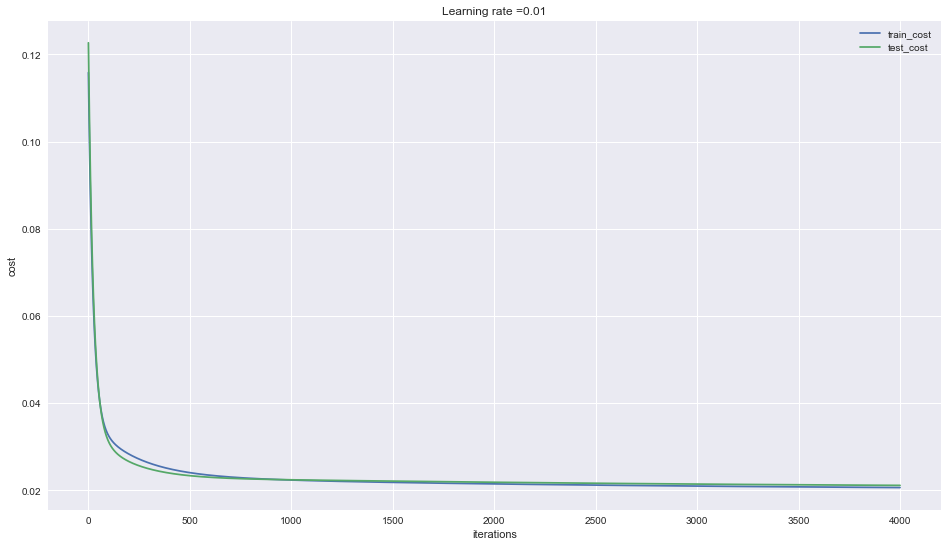

MAE                      0.167
train_MAE                0.166
test_MAE                  0.17
MSE                      0.042
train_MSE                0.041
test_MSE                 0.042
RMSE                     0.204
train_RMSE               0.451
test_RMSE                0.451
MEAN                     0.419
R2                        0.38
avg error: 0.1343371868978809
max error: 0.334


--- Try out with a 4 degree polynome ---


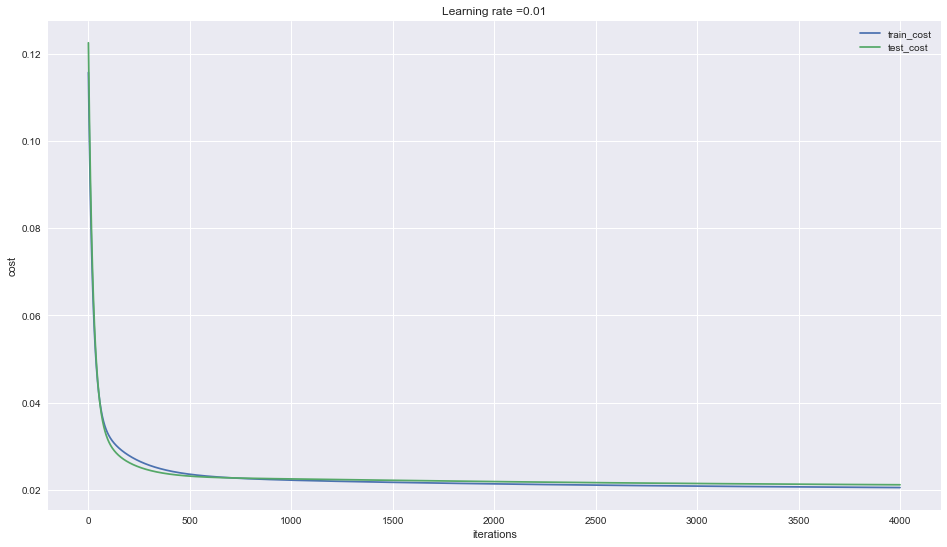

MAE                      0.167
train_MAE                0.166
test_MAE                  0.17
MSE                      0.041
train_MSE                0.041
test_MSE                 0.042
RMSE                     0.203
train_RMSE               0.451
test_RMSE                0.451
MEAN                     0.419
R2                       0.383
avg error: 0.1341265253692996
max error: 0.337


--- Try out with a 5 degree polynome ---


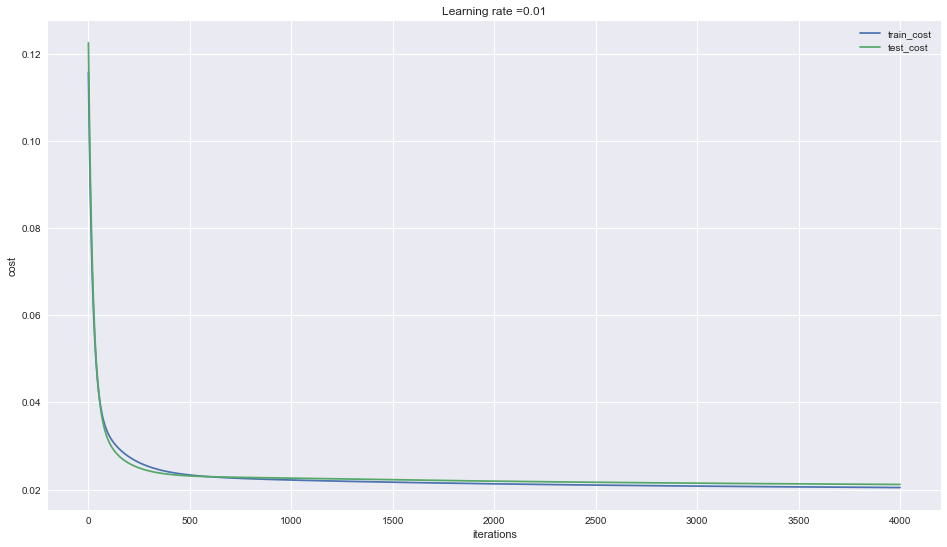

MAE                      0.167
train_MAE                0.165
test_MAE                  0.17
MSE                      0.041
train_MSE                0.041
test_MSE                 0.042
RMSE                     0.203
train_RMSE               0.451
test_RMSE                0.451
MEAN                     0.419
R2                       0.384
avg error: 0.13400064226075795
max error: 0.338


--- Try out with a 6 degree polynome ---


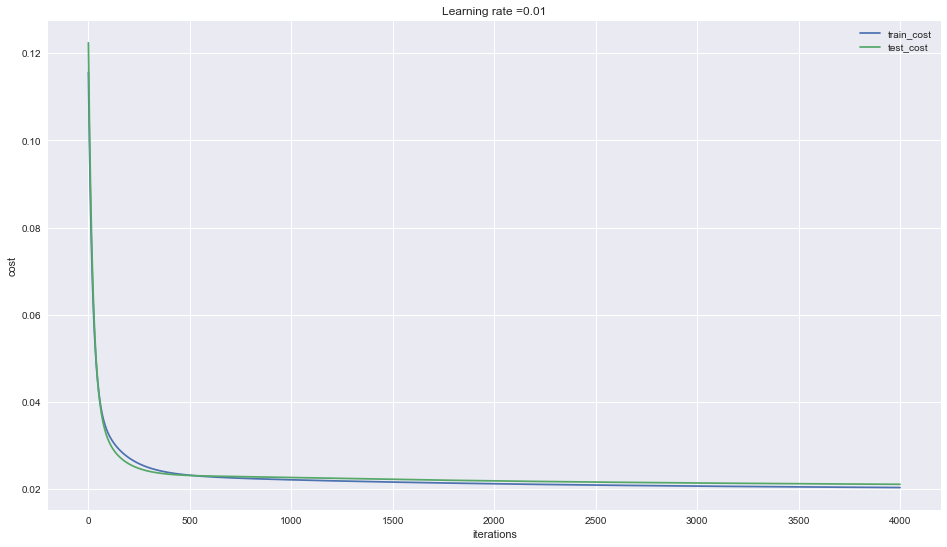

MAE                      0.166
train_MAE                0.165
test_MAE                  0.17
MSE                      0.041
train_MSE                0.041
test_MSE                 0.042
RMSE                     0.203
train_RMSE                0.45
test_RMSE                 0.45
MEAN                     0.419
R2                       0.385
avg error: 0.13390301862556211
max error: 0.339


--- Try out with a 7 degree polynome ---


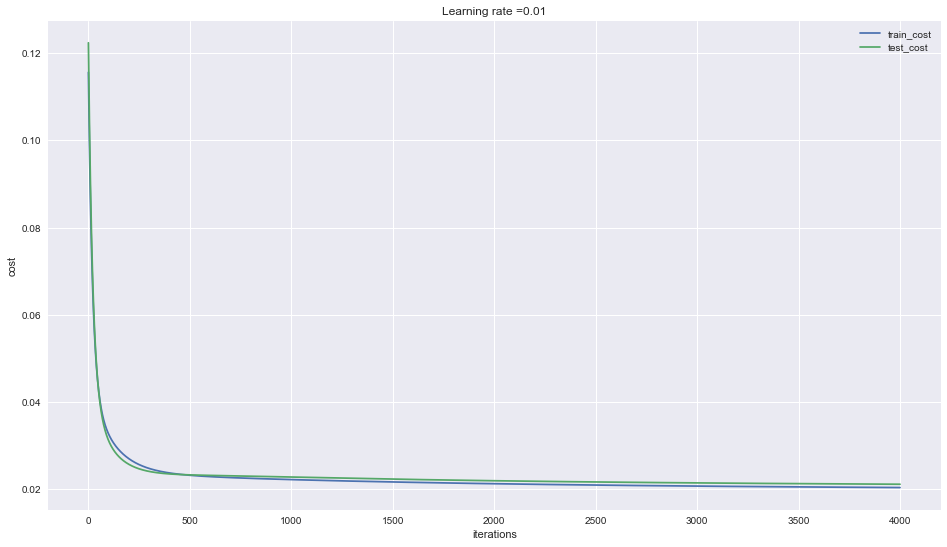

MAE                      0.166
train_MAE                0.165
test_MAE                  0.17
MSE                      0.041
train_MSE                0.041
test_MSE                 0.042
RMSE                     0.203
train_RMSE                0.45
test_RMSE                 0.45
MEAN                     0.419
R2                       0.386
avg error: 0.13384328837508017
max error: 0.339


--- Try out with a 8 degree polynome ---


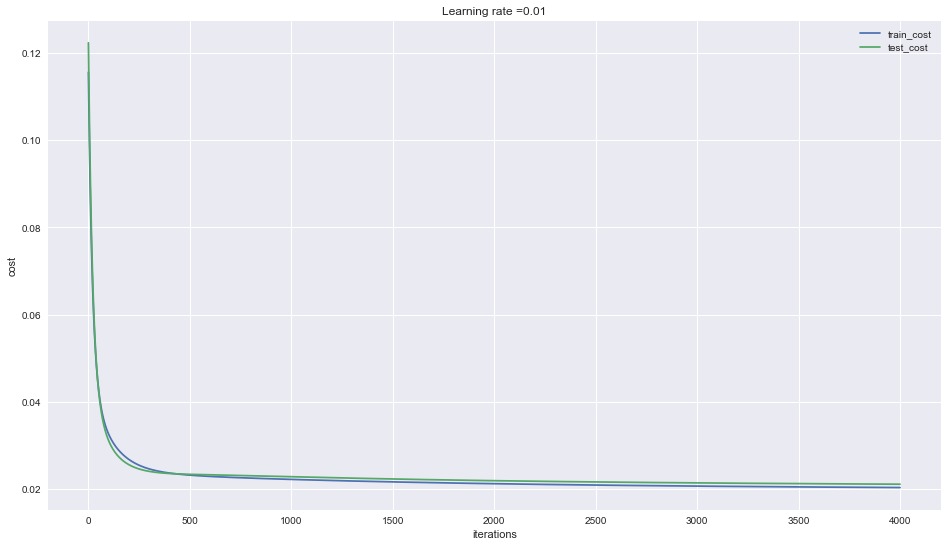

MAE                      0.166
train_MAE                0.165
test_MAE                  0.17
MSE                      0.041
train_MSE                0.041
test_MSE                 0.042
RMSE                     0.203
train_RMSE                0.45
test_RMSE                 0.45
MEAN                     0.419
R2                       0.387
avg error: 0.13372575465639067
max error: 0.34


--- Try out with a 10 degree polynome ---


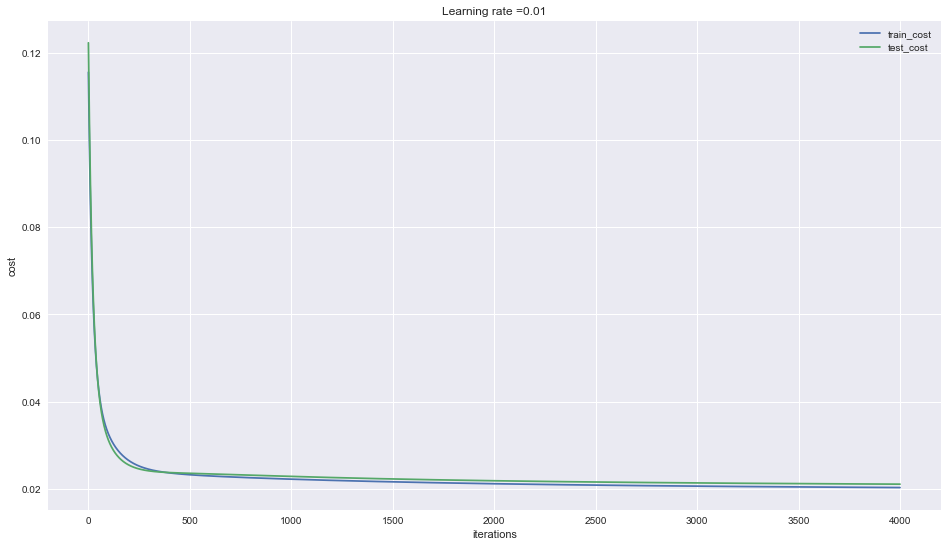

MAE                      0.166
train_MAE                0.165
test_MAE                  0.17
MSE                      0.041
train_MSE                0.041
test_MSE                 0.042
RMSE                     0.203
train_RMSE                0.45
test_RMSE                 0.45
MEAN                     0.419
R2                       0.387
avg error: 0.13362170841361615
max error: 0.34




In [69]:
# let's try out differents degrees
degrees = [2,3,4,5,6,7,8,10]
i =1
model_number = 2

for degree in degrees:
    print('--- Try out with a '+ str(degree) + ' degree polynome ---')
    X_train_p = polynomial_features(X_train, degree)
    X_test_p = polynomial_features(X_test, degree)
    X_p = polynomial_features(X, degree)
    parameters, stats['LR_model' + str(model_number)] = linear_regression(X_train_p, Y_train, X_test_p, Y_test,LEARNING_RATE,NUM_ITERS, print_cost=False)
    add_LR_results(X_p, parameters['theta'], orig_data, i )
    print('\n')
    model_number = model_number + 1
    i = i +1
    

In [70]:
orig_data

,nombre_pièces,nombre_chambres,surface,localisation,prix_achat,NN_predictions1,NN_error1,NN_predictions2,NN_error2,NN_predictions3,...,LR_predictions4,LR_error4,LR_predictions5,LR_error5,LR_predictions6,LR_error6,LR_predictions7,LR_error7,LR_predictions8,LR_error8
0,4,2.0,104.0,3.0,499000,388313,0.2218,455996,0.0862,393280,...,495432,0.007,495558,0.007,495740,0.007,495979,0.006,496487,0.005
1,3,2.0,72.0,1.0,449505,387993,0.1368,427154,0.0497,392968,...,417035,0.072,416947,0.072,417123,0.072,417372,0.071,417780,0.071
2,5,4.0,99.0,8.0,410000,388871,0.0515,447739,-0.0920,393824,...,444878,-0.085,443644,-0.082,442904,-0.080,442438,-0.079,441896,-0.078
3,3,2.0,61.0,6.0,437000,388191,0.1117,386245,0.1161,393164,...,381448,0.127,381997,0.126,382074,0.126,381932,0.126,381564,0.127
4,3,2.0,69.0,6.0,420000,388215,0.0757,393176,0.0639,393188,...,394540,0.061,395005,0.060,395041,0.059,394883,0.060,394506,0.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,3,2.0,72.0,1.0,449505,387993,0.1368,427154,0.0497,392968,...,417035,0.072,416947,0.072,417123,0.072,417372,0.071,417780,0.071
1553,5,4.0,99.0,8.0,410000,388871,0.0515,447739,-0.0920,393824,...,444878,-0.085,443644,-0.082,442904,-0.080,442438,-0.079,441896,-0.078
1554,3,2.0,61.0,6.0,437000,388191,0.1117,386245,0.1161,393164,...,381448,0.127,381997,0.126,382074,0.126,381932,0.126,381564,0.127
1555,3,2.0,69.0,6.0,420000,388215,0.0757,393176,0.0639,393188,...,394540,0.061,395005,0.060,395041,0.059,394883,0.060,394506,0.061


In [71]:
orig_data[orig_data['LR_error5']< 0.1].shape[0]/orig_data.shape[0]

0.7533718689788054

In [72]:
df_stats = pd.DataFrame(stats)

In [73]:
df_stats

,NN_model1,NN_model2,NN_model3,NN_model4,LR_model1,LR_model2,LR_model3,LR_model4,LR_model5,LR_model6,LR_model7,LR_model8,LR_model9
MAE,0.217,0.180,0.216,0.189,0.172,0.168,0.167,0.167,0.167,0.166,0.166,0.166,0.166
train_MAE,0.216,0.179,0.216,0.190,0.171,0.167,0.166,0.166,0.165,0.165,0.165,0.165,0.165
test_MAE,0.220,0.183,0.217,0.189,0.174,0.170,0.170,0.170,0.170,0.170,0.170,0.170,0.170
MSE,0.071,0.047,0.069,0.052,0.044,0.042,0.042,0.041,0.041,0.041,0.041,0.041,0.041
train_MSE,0.071,0.047,0.070,0.052,0.044,0.042,0.041,0.041,0.041,0.041,0.041,0.041,0.041
test_MSE,0.071,0.046,0.069,0.050,0.044,0.042,0.042,0.042,0.042,0.042,0.042,0.042,0.042
RMSE,0.267,0.217,0.263,0.228,0.209,0.205,0.204,0.203,0.203,0.203,0.203,0.203,0.203
train_RMSE,0.517,0.465,0.513,0.477,0.457,0.453,0.451,0.451,0.451,0.450,0.450,0.450,0.450
test_RMSE,0.517,0.465,0.513,0.477,0.457,0.453,0.451,0.451,0.451,0.450,0.450,0.450,0.450
MEAN,0.419,0.419,0.419,0.419,0.419,0.419,0.419,0.419,0.419,0.419,0.419,0.419,0.419


Synthesis
We saw how we could use a neural net with no activation function to predict outputs. As there are no activation function, the final function is also a linear function of our features and we wanted to see if a neural net could be better on that type of problem than linear regression.
Stats results in that case clearly indicate we should use linear regression with polynomial features rather than neural nets. 
Note that our Neural net works without any regularization and without learning rate reevaluation or automatic optimizer, such an analysis with more powerfull tools like tensorflow or scikitlearn could give other results. Anyway our dataset contains a lot of districts and a very limited choice of features, it makes the training of the model harder.


In [168]:
orig_data['localisation'] = loc_encoder.inverse_transform(np.expand_dims(orig_data['localisation'], axis = 1))

In [169]:
orig_data.to_csv('predictions.csv')

In [170]:
df_stats.to_csv('statistics.csv')